# Drawing Basic Sentiment Curves

First part of the project is to extract amplitude values for the windows by using the sentiments. Unfortunately the Syuhzet dictionaries and the method used in the original paper are currently only available for R, thus I will do preliminary demonstration with Python and NLTK only. NLTK reports three distinct sentiments; let's see how they look like.

In [2]:
# Just testing how to reuse modules on Jupyter Notebooks

import os
import sys
sys.path.insert(0, os.path.abspath('../modules'))

from book_analytics import BookAnalytics

ba = BookAnalytics("64317.txt.utf-8", book_path="../static/books")
windows, title = ba.parse_windows()
print(len(windows))
print(windows[50])

[nltk_data] Downloading package names to /home/ahtiah/nltk_data...
[nltk_data]   Package names is already up-to-date!
[nltk_data] Downloading package stopwords to /home/ahtiah/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package state_union to
[nltk_data]     /home/ahtiah/nltk_data...
[nltk_data]   Package state_union is already up-to-date!
[nltk_data] Downloading package twitter_samples to
[nltk_data]     /home/ahtiah/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     /home/ahtiah/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/ahtiah/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/ahtiah/nltk_data...
[nltk_data]   Packag

709
{'text': 'Do you see ?” There was something pathetic in his concentration , as if his complacency , more acute than of old , was not enough to him any more . When , almost immediately , the telephone rang inside and the butler left the porch Daisy seized upon the momentary interruption and leaned towards me . “ I ’ ll tell you a family secret ,” she whispered enthusiastically . “ It ’ s about the butler ’ s nose . Do you want to hear about the butler ’ s nose ?”', 'sentiment': {'neg': 0.081, 'neu': 0.859, 'pos': 0.06, 'compound': -0.3939}}


In [3]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

[0.19, 0.106, 0.056, 0.0, 0.139, 0.064, 0.261, 0.058, 0.221, 0.108] [0.049, 0.039, 0.056, 0.047, 0.088, 0.073, 0.0, 0.072, 0.133, 0.075] [0.761, 0.856, 0.888, 0.953, 0.772, 0.863, 0.739, 0.87, 0.646, 0.817] [0.8718, 0.7785, -0.0098, -0.3818, 0.7377, -0.1531, 0.979, -0.5719, 0.7957, 0.4817]


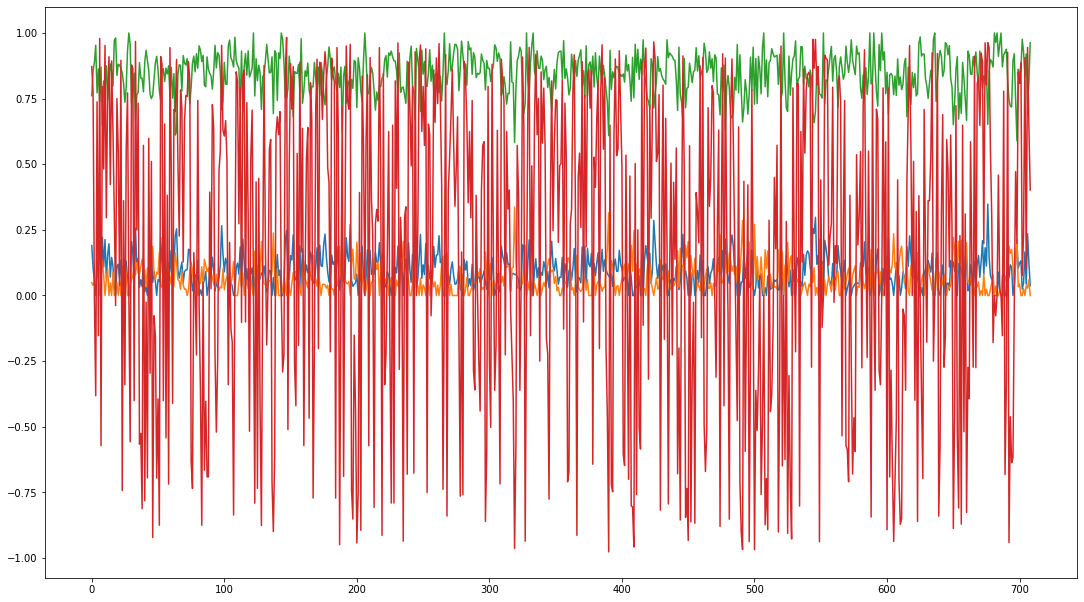

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

pos = []
neg = []
neu = []
compound = []
base = []

for window in windows:
    pos.append(window['sentiment']['pos'])
    neg.append(window['sentiment']['neg'])
    neu.append(window['sentiment']['neu'])
    compound.append(window['sentiment']['compound'])

print(pos[0:10], neg[0:10], neu[0:10], compound[0:10])

fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
ax.plot(range(len(pos)), pos, label="Positive")
ax.plot(range(len(pos)), neg, label="Negative")
ax.plot(range(len(pos)), neu, label="Neutral")
ax.plot(range(len(pos)), compound, label="Compound");

## Deeper Investigation

Do we have anything useful here? Let's locate uninteresting dramatic paragraph from the data (paragraph 184).

171 The moon had risen higher , and floating in the Sound was a triangle of silver scales , trembling a little to the stiff , tinny drip of the banjoes on the lawn . I was still with Jordan Baker . We were sitting at a table with a man of about my age and a rowdy little girl , who gave way upon the slightest provocation to uncontrollable laughter .
172 I was enjoying myself now . I had taken two finger - bowls of champagne , and the scene had changed before my eyes into something significant , elemental , and profound . At a lull in the entertainment the man looked at me and smiled . “ Your face is familiar ,” he said politely . “ Weren ’ t you in the First Division during the war ?” “ Why yes . I was in the Twenty - eighth Infantry .” “ I was in the Sixteenth until June nineteen - eighteen .
173 I knew I ’ d seen you somewhere before .” We talked for a moment about some wet , grey little villages in France . Evidently he lived in this vicinity , for he told me that he had just bought 

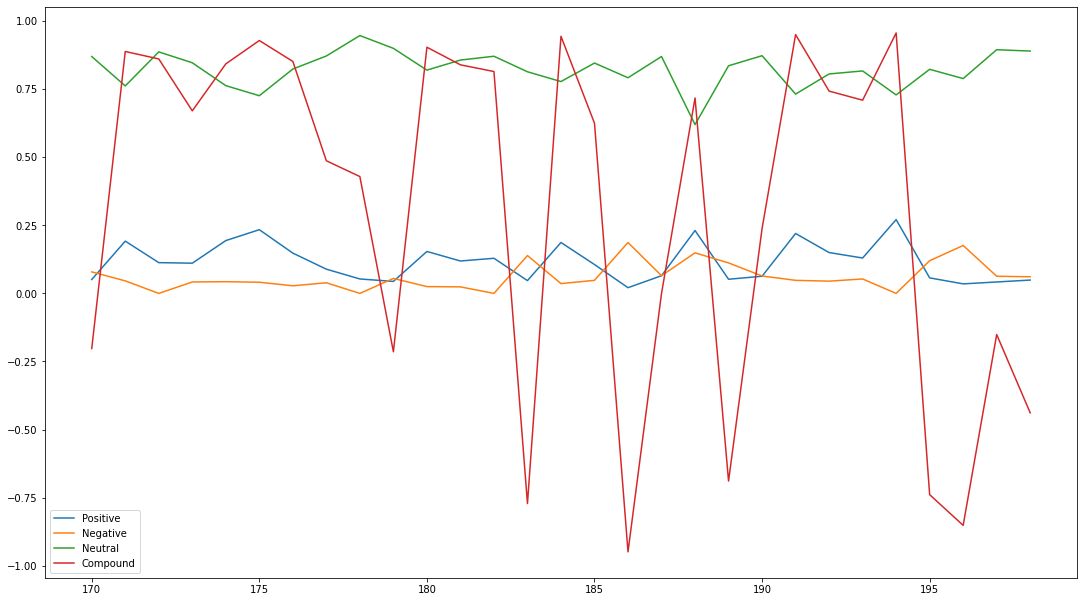

In [5]:
def get_sub(start, end, windows):
    sub_pos = []
    sub_neg = []
    sub_neu = []
    sub_compound = []
    for i in range(len(windows)):
        if i > start and i < end:
            print(i, windows[i]['text'])
            sub_pos.append(windows[i]['sentiment']['pos'])
            sub_neg.append(windows[i]['sentiment']['neg'])
            sub_neu.append(windows[i]['sentiment']['neu'])
            sub_compound.append(windows[i]['sentiment']['compound'])
    fig, ax = plt.subplots()
    fig.set_size_inches(18.5, 10.5)
    ax.plot(range(start, start + len(sub_pos)), sub_pos, label="Positive")
    ax.plot(range(start, start + len(sub_neg)), sub_neg, label="Negative")
    ax.plot(range(start, start + len(sub_neu)), sub_neu, label="Neutral")
    ax.plot(range(start, start + len(sub_compound)), sub_compound, label="Compound");
    ax.legend()
    
%matplotlib inline
get_sub(170, 200, windows)

Then we have the MICE start for an inquiry arc in here at paragraph 394

381 Or perhaps I had merely grown used to it , grown to accept West Egg as a world complete in itself , with its own standards and its own great figures , second to nothing because it had no consciousness of being so , and now I was looking at it again , through Daisy ’ s eyes .
382 It is invariably saddening to look through new eyes at things upon which you have expended your own powers of adjustment . They arrived at twilight , and , as we strolled out among the sparkling hundreds , Daisy ’ s voice was playing murmurous tricks in her throat . “ These things excite me so ,” she whispered . “ If you want to kiss me any time during the evening , Nick , just let me know and I ’ ll be glad to arrange it for you .
383 Just mention my name . Or present a green card . I ’ m giving out green —” “ Look around ,” suggested Gatsby . “ I ’ m looking around . I ’ m having a marvellous —” “ You must see the faces of many people you ’ ve heard about .” Tom ’ s arrogant eyes roamed the crowd . “ We d

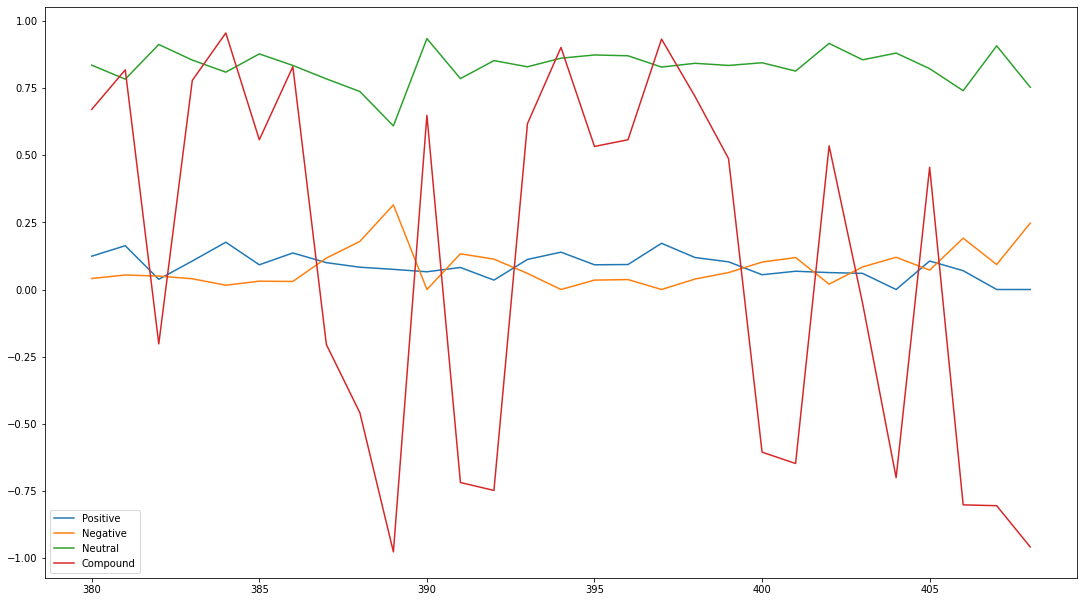

In [6]:
get_sub(380, 410, windows)

## First Step Improvement

Instead of having absolute value of sentiment amplitudes, we might benefit from something that better captures the dynamic changes, like sum of the intervals or a moving average.

In [7]:
inter = []

# Fix this for a bit better way to avoid miss indexing
mov_avg = [0, 0]
inter_sum = [0, 0]

print(compound[0:5])

for i in range(len(compound)):
    if i < len(compound) - 1:
        inter.append(abs(compound[i] - compound[i +1]))
    if i > 4:
        mov_avg.append(sum(compound[i-5:i]) / 5)
        inter_sum.append(sum(inter[i-5:i]) / 5)

print(mov_avg[0], mov_avg[len(compound)-5])

[0.8718, 0.7785, -0.0098, -0.3818, 0.7377]
0 0.45348000000000005


171 The moon had risen higher , and floating in the Sound was a triangle of silver scales , trembling a little to the stiff , tinny drip of the banjoes on the lawn . I was still with Jordan Baker . We were sitting at a table with a man of about my age and a rowdy little girl , who gave way upon the slightest provocation to uncontrollable laughter .
172 I was enjoying myself now . I had taken two finger - bowls of champagne , and the scene had changed before my eyes into something significant , elemental , and profound . At a lull in the entertainment the man looked at me and smiled . “ Your face is familiar ,” he said politely . “ Weren ’ t you in the First Division during the war ?” “ Why yes . I was in the Twenty - eighth Infantry .” “ I was in the Sixteenth until June nineteen - eighteen .
173 I knew I ’ d seen you somewhere before .” We talked for a moment about some wet , grey little villages in France . Evidently he lived in this vicinity , for he told me that he had just bought 

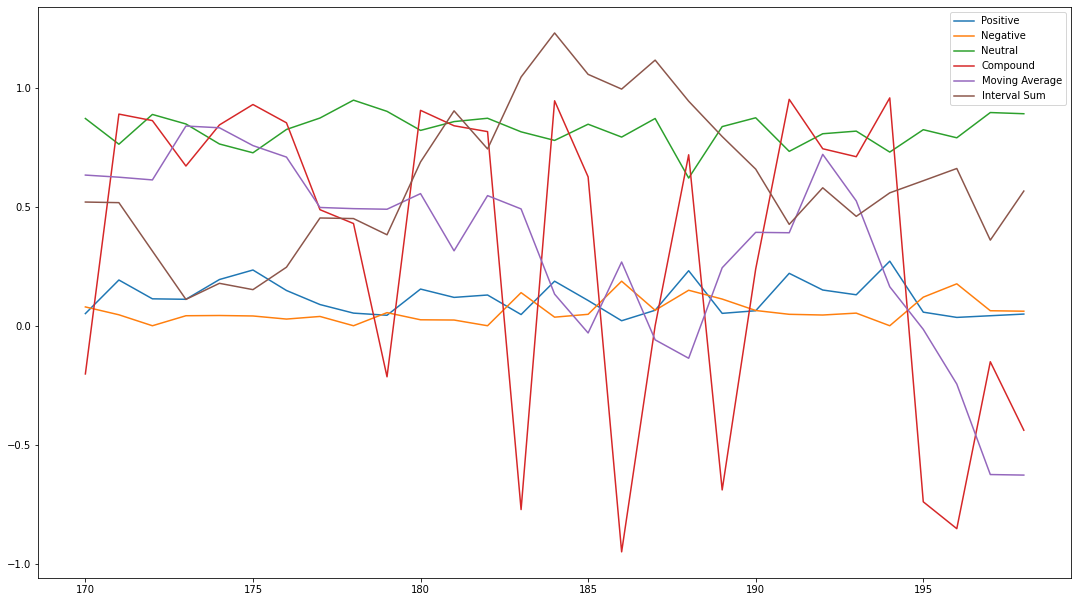

In [8]:
def get_sub_2(start, end, windows):
    sub_pos = []
    sub_neg = []
    sub_neu = []
    sub_compound = []
    sub_mov_avg = []
    sub_inter_sum = []
    for i in range(len(windows)):
        if i > start and i < end:
            print(i, windows[i]['text'])
            sub_pos.append(pos[i])
            sub_neg.append(neg[i])
            sub_neu.append(neu[i])
            sub_compound.append(compound[i])
            sub_mov_avg.append(mov_avg[i])
            sub_inter_sum.append(inter_sum[i])
    fig, ax = plt.subplots()
    fig.set_size_inches(18.5, 10.5)
    ax.plot(range(start, start + len(sub_pos)), sub_pos, label="Positive")
    ax.plot(range(start, start + len(sub_neg)), sub_neg, label="Negative")
    ax.plot(range(start, start + len(sub_neu)), sub_neu, label="Neutral")
    ax.plot(range(start, start + len(sub_compound)), sub_compound, label="Compound");
    ax.plot(range(start, start + len(sub_mov_avg)), sub_mov_avg, label="Moving Average");
    ax.plot(range(start, start + len(sub_inter_sum)), sub_inter_sum, label="Interval Sum");
    ax.legend()
    
%matplotlib inline
get_sub_2(170, 200, windows)

381 Or perhaps I had merely grown used to it , grown to accept West Egg as a world complete in itself , with its own standards and its own great figures , second to nothing because it had no consciousness of being so , and now I was looking at it again , through Daisy ’ s eyes .
382 It is invariably saddening to look through new eyes at things upon which you have expended your own powers of adjustment . They arrived at twilight , and , as we strolled out among the sparkling hundreds , Daisy ’ s voice was playing murmurous tricks in her throat . “ These things excite me so ,” she whispered . “ If you want to kiss me any time during the evening , Nick , just let me know and I ’ ll be glad to arrange it for you .
383 Just mention my name . Or present a green card . I ’ m giving out green —” “ Look around ,” suggested Gatsby . “ I ’ m looking around . I ’ m having a marvellous —” “ You must see the faces of many people you ’ ve heard about .” Tom ’ s arrogant eyes roamed the crowd . “ We d

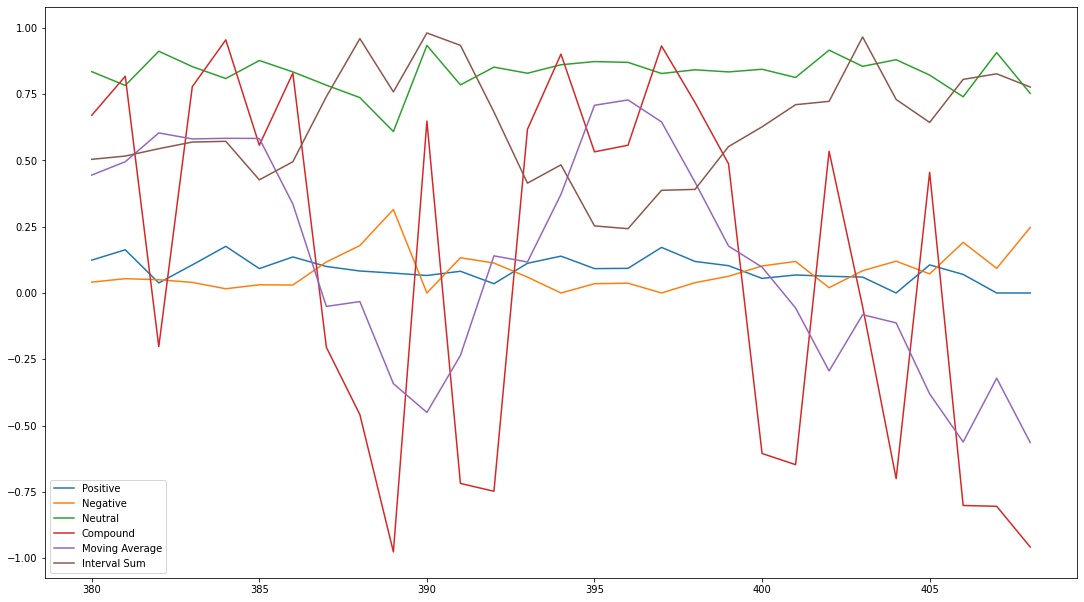

In [9]:
get_sub_2(380, 410, windows)

## Build Golden Rank Benchmark

Here we will establish the basis of our test bench. The idea of the golden rank is that items labeled as `dramatic` ought to be ranked on top of the list and items items labeled as `boring` ought to be prioritized as `boring` ought to be ranked at the bottom. Thus the goodness of the algorithm can be deduced from the average distances; however, we ought to be careful here as we still have not established a baseline metric and our amount of labels is going to be small at first: it is hard to tell which aspects of `boring` are meaningful and which are not, thus we perhaps ought to favor only high ranking `dramatic` algorithms.

In [10]:
dramatic = [394]
boring = [184]

rank_windows = []

for i in range(len(windows)):
    rank_windows.append({
        "id": i,
        "text": windows[i]['text'],
        "compound": windows[i]['sentiment']['compound'],
        "mov_avg": mov_avg[i],
        "inter_sum": inter_sum[i]
    })
    if i > len(windows) - 5:
        break

print(rank_windows[394])

{'id': 394, 'text': '“ Who is this Gatsby anyhow ?” demanded Tom suddenly . “ Some big bootlegger ?” “ Where ’ d you hear that ?” I inquired . “ I didn ’ t hear it . I imagined it . A lot of these newly rich people are just big bootleggers , you know .” “ Not Gatsby ,” I said shortly . He was silent for a moment . The pebbles of the drive crunched under his feet . “ Well , he certainly must have strained himself to get this menagerie together .”', 'compound': 0.6174, 'mov_avg': 0.11694, 'inter_sum': 0.4144000000000001}


In [11]:
# Sort and check the rank
rank_windows.sort(key=lambda x: x['inter_sum'])
for i in range(len(rank_windows)):
    if rank_windows[i]['id'] in dramatic:
        print("rank", i, " of ", len(rank_windows), rank_windows[i])

print(min(inter_sum[3:]), max(inter_sum))

rank 144  of  706 {'id': 394, 'text': '“ Who is this Gatsby anyhow ?” demanded Tom suddenly . “ Some big bootlegger ?” “ Where ’ d you hear that ?” I inquired . “ I didn ’ t hear it . I imagined it . A lot of these newly rich people are just big bootleggers , you know .” “ Not Gatsby ,” I said shortly . He was silent for a moment . The pebbles of the drive crunched under his feet . “ Well , he certainly must have strained himself to get this menagerie together .”', 'compound': 0.6174, 'mov_avg': 0.11694, 'inter_sum': 0.4144000000000001}
0.11059999999999999 1.22906


## Second Steps of Improvements

Now that we have established a very simple way of measuring the first results, it would be time to move on. For example, we know that the high drama point of the paragraph 394 does rank quite well, 144 is on top 20%, which already is quite good, we also know that the potency of that paragraph is probably higher. One problem with our inter_sum metric is that there is a global effect for the curve, which affects the local positive and negative peaks. For example, our dramatic high points should be near zero, while in fact this one is near 0.4 in a valley of near 1.0 positive peaks. We could get better performance by regularizating the values a bit.

However, the original method also seems to be using fractal dimensions in a more deep manner, where a long term trend is considered. It is hard to say if such method would improve our more "micro" level details, considering that the purpose of the original paper was to discover a rather small number of dramatic turns, while in our case we might also be interested in more complex details. On the other hand, the method depends on parameters which would allow us to collect different ranges and we might be able to build a "Fourier"-like analysis from there by feeding different dramatic arc lengths.

Anyway, first thing to do is to add more bench mark annotations and then to improve the algorithm a bit.

Also,  I got the idea that the paper is using least squares method for doing the non-linear adaptive filtering base values, so I will try that next.

### More bench mark annotations

411 Next day Gatsby called me on the phone . “ Going away ?” I inquired . “ No , old sport .” “ I hear you fired all your servants .” “ I wanted somebody who wouldn ’ t gossip . Daisy comes over quite often — in the afternoons .” So the whole caravansary had fallen in like a card house at the disapproval in her eyes . “ They ’ re some people Wolfshiem wanted to do something for . They ’ re all brothers and sisters . They used to run a small hotel .”
412 “ I see .” He was calling up at Daisy ’ s request — would I come to lunch at her house tomorrow ? Miss Baker would be there . Half an hour later Daisy herself telephoned and seemed relieved to find that I was coming . Something was up . And yet I couldn ’ t believe that they would choose this occasion for a scene — especially for the rather harrowing scene that Gatsby had outlined in the garden .
413 The next day was broiling , almost the last , certainly the warmest , of the summer . As my train emerged from the tunnel into sunlight , 

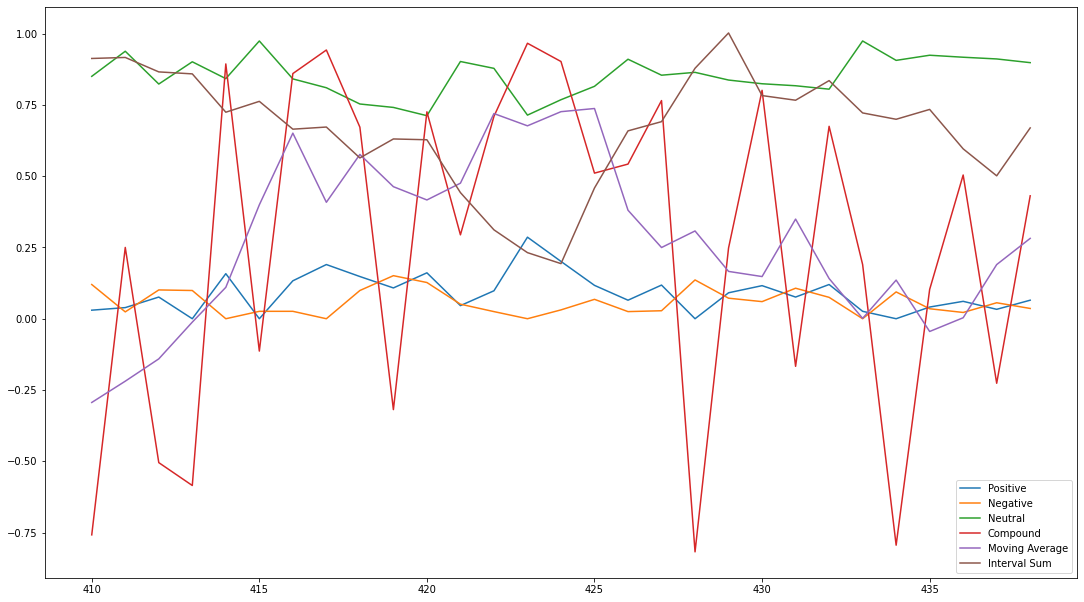

In [12]:
get_sub_2(410, 440, windows)

Paragraph 413 ought to be boring

471 “ I suppose the latest thing is to sit back and let Mr . Nobody from Nowhere make love to your wife . Well , if that ’ s the idea you can count me out … Nowadays people begin by sneering at family life and family institutions , and next they ’ ll throw everything overboard and have intermarriage between black and white .”
472 Flushed with his impassioned gibberish , he saw himself standing alone on the last barrier of civilization . “ We ’ re all white here ,” murmured Jordan . “ I know I ’ m not very popular . I don ’ t give big parties . I suppose you ’ ve got to make your house into a pigsty in order to have any friends — in the modern world .” Angry as I was , as we all were , I was tempted to laugh whenever he opened his mouth .
473 The transition from libertine to prig was so complete . “ I ’ ve got something to tell you , old sport —” began Gatsby . But Daisy guessed at his intention . “ Please don ’ t !” she interrupted helplessly . “ Please let ’ s all go home . Why don ’ 

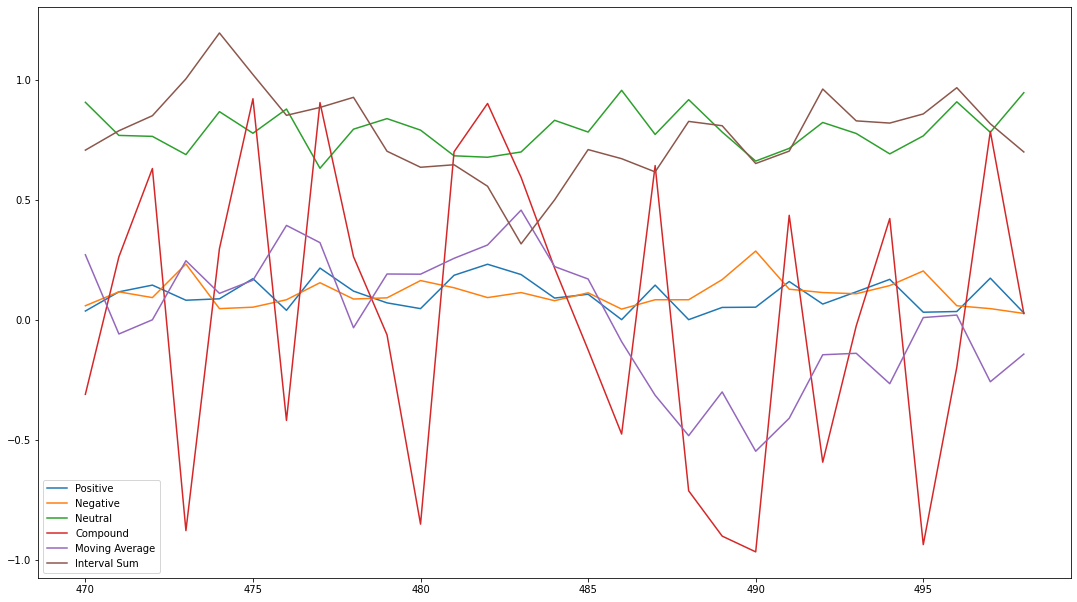

In [13]:
get_sub_2(470, 500, windows)

Paragraph 487 answers MICE Inquiry about Gatsby's background.

431 “ Who wants to go to town ?” demanded Daisy insistently . Gatsby ’ s eyes floated toward her . “ Ah ,” she cried , “ you look so cool .” Their eyes met , and they stared together at each other , alone in space . With an effort she glanced down at the table . “ You always look so cool ,” she repeated . She had told him that she loved him , and Tom Buchanan saw . He was astounded . His mouth opened a little , and he looked at Gatsby , and then back at Daisy as if he had just recognized her as someone he knew a long time ago .
432 “ You resemble the advertisement of the man ,” she went on innocently . “ You know the advertisement of the man —” “ All right ,” broke in Tom quickly , “ I ’ m perfectly willing to go to town . Come on — we ’ re all going to town .” He got up , his eyes still flashing between Gatsby and his wife . No one moved . “ Come on !” His temper cracked a little . “ What ’ s the matter , anyhow ? If we ’ re going to town , let ’ s start .”
433 His hand , trembling wi

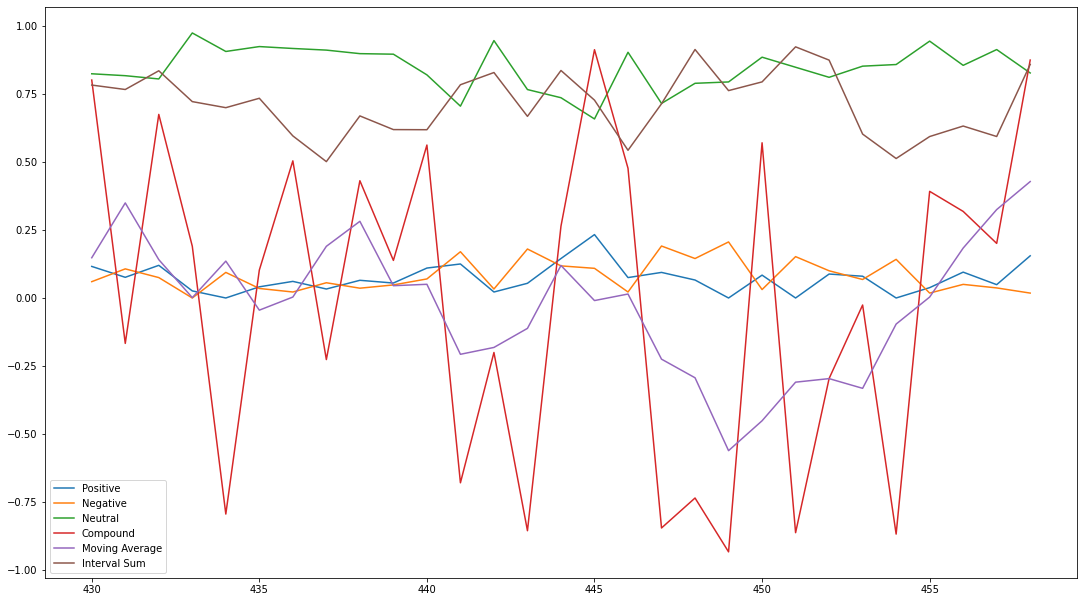

In [14]:
get_sub_2(430, 460, windows)

Paragraph 441 ought to be Promises Progresses and Payoffs aspect of Progress for MICE arc Inquiry about Gatsby's past.

491 It passed , and he began to talk excitedly to Daisy , denying everything , defending his name against accusations that had not been made . But with every word she was drawing further and further into herself , so he gave that up , and only the dead dream fought on as the afternoon slipped away , trying to touch what was no longer tangible , struggling unhappily , undespairingly , toward that lost voice across the room .
492 The voice begged again to go . “ Please , Tom ! I can ’ t stand this any more .” Her frightened eyes told that whatever intentions , whatever courage she had had , were definitely gone . “ You two start on home , Daisy ,” said Tom . “ In Mr . Gatsby ’ s car .” She looked at Tom , alarmed now , but he insisted with magnanimous scorn . “ Go on . He won ’ t annoy you . I think he realizes that his presumptuous little flirtation is over .”
493 They were gone , without a word , snapped out , made accidental , isolated , like ghosts , even from our pity . After a mome

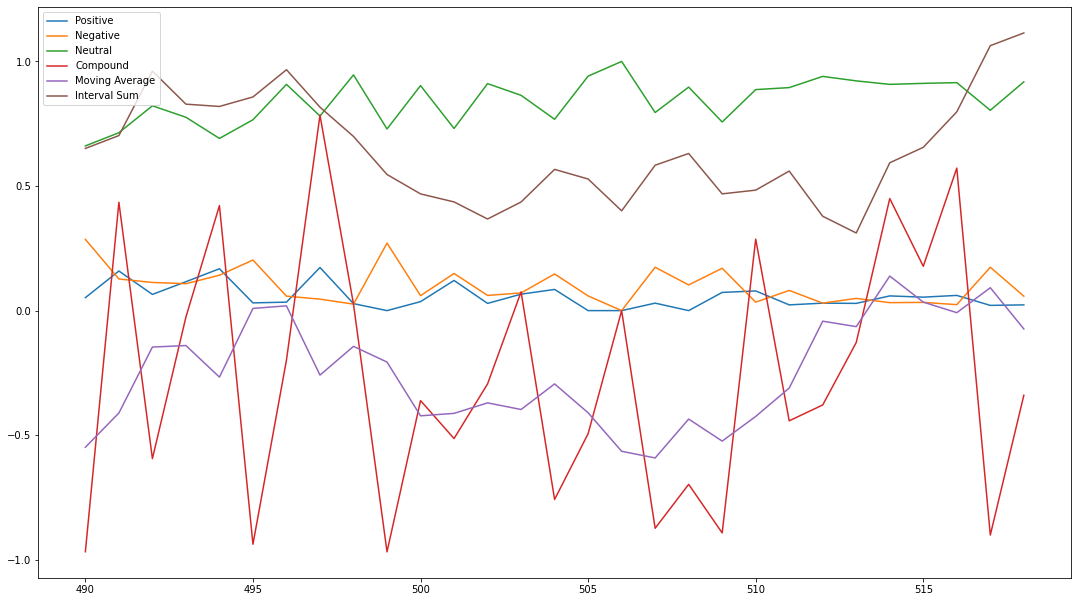

In [15]:
get_sub_2(490, 520, windows)

Paragraph 500 is no exactly a dramatic point by any theory, but it still has Myrtle's death scene, which might be important for any reader; though it might be incorrect from theoretical point of view.

## Non-Linear Adaptive Filtering

Let's try doing the Non-linear Adaptive Filtering as instructed in the paper.

In [16]:
import nltk
from nltk.corpus import PlaintextCorpusReader
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download([
    "names",
    "stopwords",
    "state_union",
    "twitter_samples",
    "movie_reviews",
    "averaged_perceptron_tagger",
    "vader_lexicon",
    "punkt",
])

sia = SentimentIntensityAnalyzer()
book_text = PlaintextCorpusReader("../static/books/", "64317.txt.utf-8")

len(book_text.words())

[nltk_data] Downloading package names to /home/ahtiah/nltk_data...
[nltk_data]   Package names is already up-to-date!
[nltk_data] Downloading package stopwords to /home/ahtiah/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package state_union to
[nltk_data]     /home/ahtiah/nltk_data...
[nltk_data]   Package state_union is already up-to-date!
[nltk_data] Downloading package twitter_samples to
[nltk_data]     /home/ahtiah/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     /home/ahtiah/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/ahtiah/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/ahtiah/nltk_data...
[nltk_data]   Packag

64012

[1852, 2137, 2428, 2494] [855, 1958]


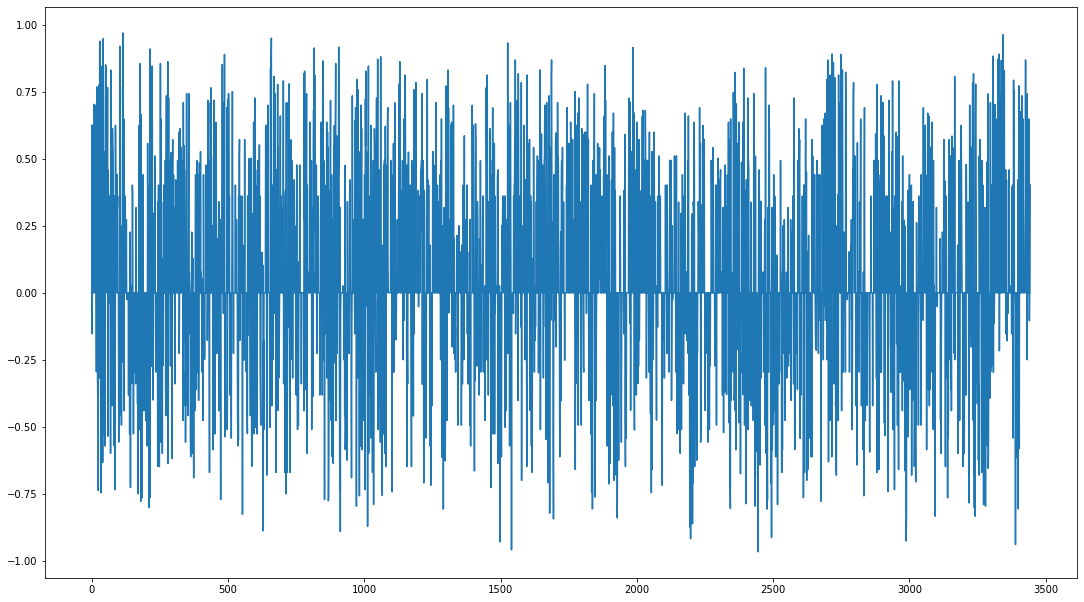

In [19]:
# First we assume that the unit of measurement is sentence, 
# since the original research had timeline of length 5000+
# The Great Gatsby has 3444

import re

dramatic_sents = []
boring_sents = []

timeline = []
for sent in book_text.sents():
    sent = re.compile(r"\s+").sub(" ", " ".join(sent)).strip()
    timeline.append(sia.polarity_scores(sent)['compound'])
    # For some reason chaining OR statements leads to weird bugs
    if "Who is this Gatsby anyhow" in sent:
        dramatic_sents.append(len(timeline))
    if "I picked him for a bootlegger the first time I saw him" in sent:
        dramatic_sents.append(len(timeline))
    if "A moment later she rushed out into the dusk" in sent:
        dramatic_sents.append(len(timeline))
    if "made a small investigation of this fellow" in sent:
        dramatic_sents.append(len(timeline))
    if "but no one swooned backward on Gatsby" in sent:
        boring_sents.append(len(timeline))
    if "only the hot whistles of the National Biscuit Company broke the simmering hush at noon" in sent:
        boring_sents.append(len(timeline))

fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
ax.plot(range(len(timeline)), timeline, label="Compound");

print(dramatic_sents, boring_sents)

In [20]:
def do_segmentation(n, timeline):
    segment_timeline = []
    filtered_timeline = []
    dramatic_segs = []
    boring_segs = []
    print(dramatic_sents, boring_sents)
    # We will implement this algorithm as one run, which means that we will
    # cumulate the values to the
    segment_index = -1
    for l in range(len(timeline)):
        if l in dramatic_sents:
            dramatic_segs.append(segment_index)
            print("Dramatic segment: ", segment_index, len(filtered_timeline))
        if l in boring_sents:
            boring_segs.append(segment_index)
            print("Boring segment: ", segment_index, len(filtered_timeline))
        # print(l, filtered_timeline, segment_timeline, segment_index)
        if (l + n) == len(timeline):
            break
        if l % n == 0:
            segment_timeline.append([])
            segment_index += 1
        if l % n == 1 and l > 2*n:
            w1 = 1 - ( ( ( l % n + 1 ) - 1 ) / n) # + 1 for avoiding 0 index
            w2 = 1 - w1
            yc = w1*timeline[l + n] + w2*timeline[l]
            segment_timeline[segment_index - 2].append(yc)
            filtered_timeline.append(sum(segment_timeline[segment_index - 2]) / len(segment_timeline[segment_index - 2]))
            # print("Here")
        # iterate through the 2n+1 part after n has been covered
        if l >= n:
            w1 = 1 - ( ( ( l % n + 1 ) - 1 ) / n) # + 1 for avoiding 0 index
            w2 = 1 - w1
            yc = w1*timeline[l + n] + w2*timeline[l]
            segment_timeline[segment_index - 1].append(yc)
        w1 = 1 - ( ( ( l % n + 1 ) - 1 ) / n) # + 1 for avoiding 0 index
        w2 = 1 - w1
        yc = w1*timeline[l + n] + w2*timeline[l]
        segment_timeline[segment_index].append(yc)

    fig, axs = plt.subplots((len(dramatic_segs) + len(boring_segs)), 1, constrained_layout=True)
    fig.set_size_inches(18.5, 20.5)
    fig.suptitle('Dramatic and Boring should be local minima and maxima (n=' + str(n) + ')', fontsize=16)
    img_count=-1
    for index in dramatic_segs:
        print(index, img_count, range(index - 10, index - 10 + len(filtered_timeline[index - 10: index + 10])), filtered_timeline[index - 10: index + 10])
        img_count += 1
        axs[img_count].plot(range(index - 10, index - 10 + len(filtered_timeline[index - 10: index + 10])), filtered_timeline[index - 10: index + 10], label="NAF")
        axs[img_count].set_title('Dramatic (at ' + str(index) + ')')
    for index in boring_segs:
        print(index)
        img_count += 1
        axs[img_count].plot(range(index - 10, index - 10 + len(filtered_timeline[index - 10: index + 10])), filtered_timeline[index - 10: index + 10], label="NAF")
        axs[img_count].set_title('Boring (at ' + str(index) + ')')

    plt.show()

[1852, 2137, 2428, 2494] [855, 1958]
Boring segment:  170 169
Dramatic segment:  370 369
Boring segment:  391 390
Dramatic segment:  427 426
Dramatic segment:  485 484
Dramatic segment:  498 497
370 -1 range(360, 380) [0.16504545454545452, 0.22036727272727274, 0.17737272727272727, 0.05730545454545455, -0.10982545454545455, -0.22534363636363636, -0.1472709090909091, -0.008769090909090903, -0.05846181818181821, -0.009739999999999999, 0.11924000000000001, 0.19908909090909094, 0.1497309090909091, 0.06490363636363636, 0.16015636363636362, 0.22401818181818178, 0.1384109090909091, -0.031176363636363617, -0.09813090909090909, -0.05532363636363636]
427 0 range(417, 437) [-0.08835272727272726, -0.08428545454545454, 0.027134545454545456, 0.06161636363636364, 0.06057454545454546, 0.07817090909090908, 0.05402727272727273, 0.017152727272727278, 0.024205454545454544, 0.05135818181818182, 0.03163454545454547, -0.06229272727272727, -0.14616363636363638, -0.15252181818181818, -0.13904181818181818, 0.036

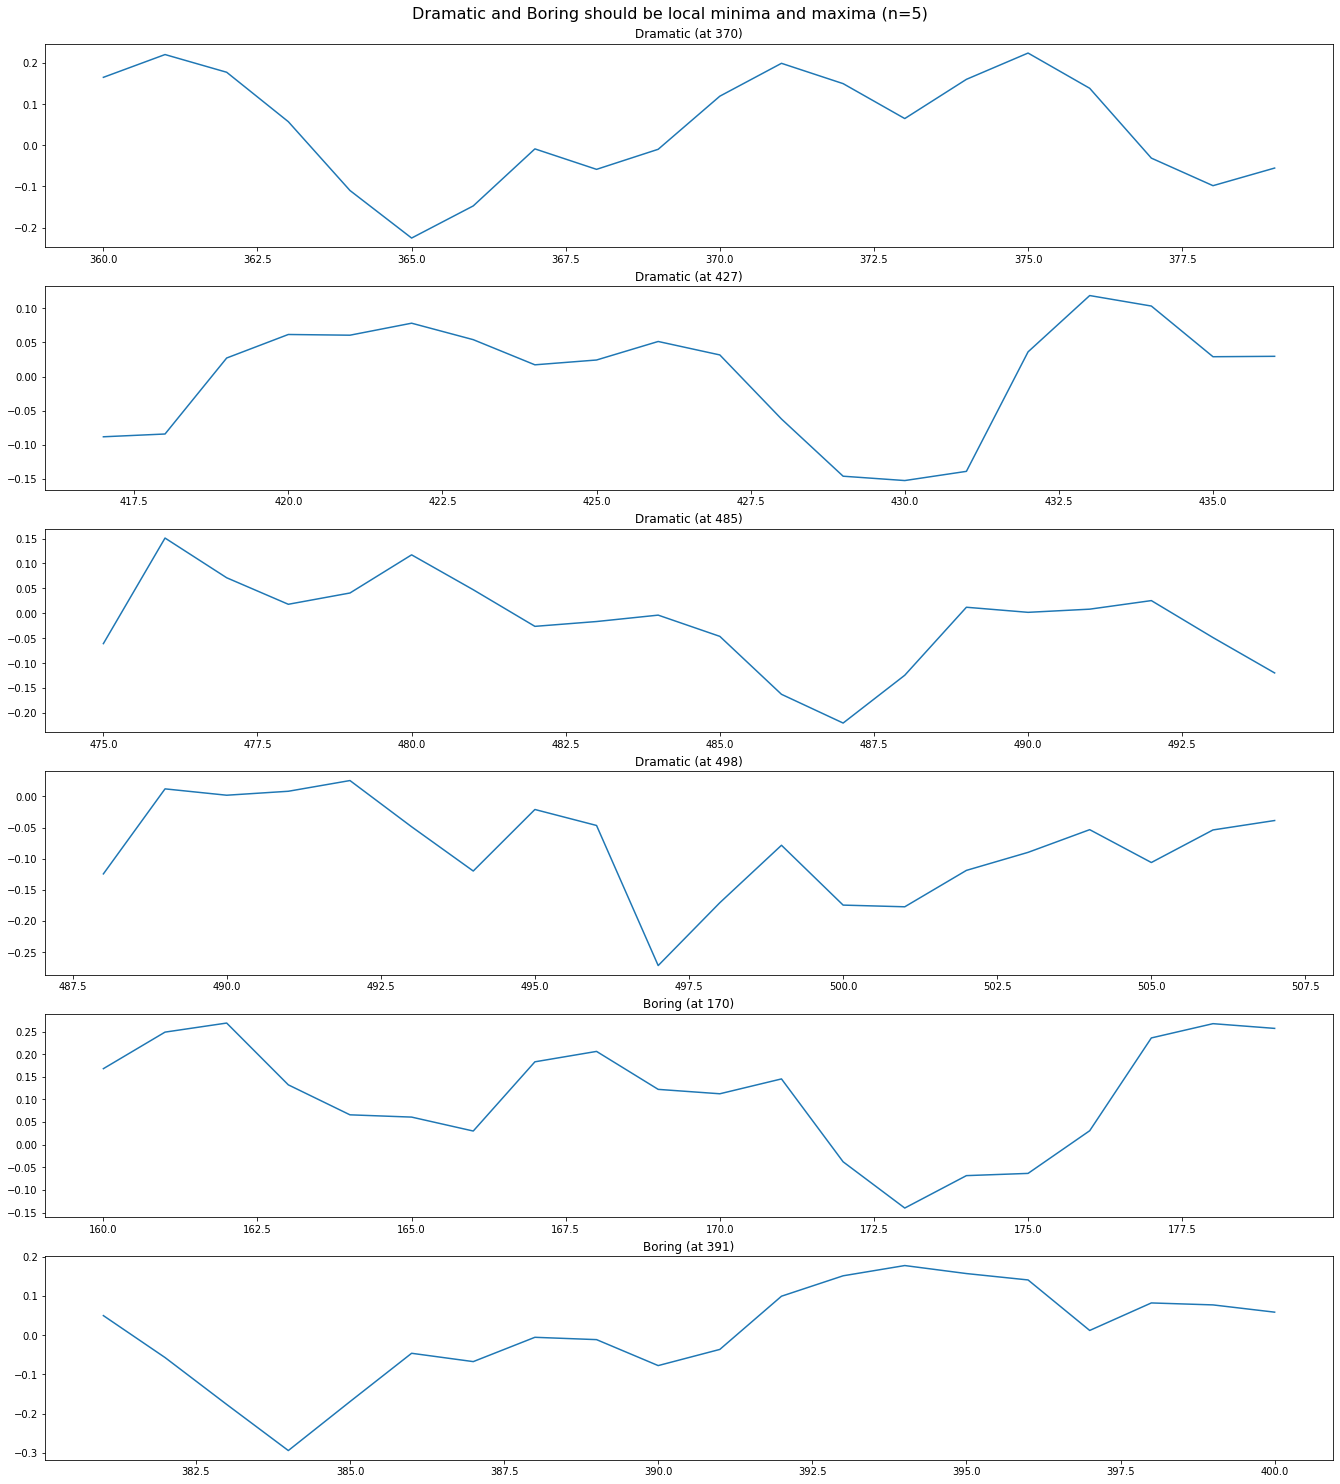

[1852, 2137, 2428, 2494] [855, 1958]
Boring segment:  85 84
Dramatic segment:  185 184
Boring segment:  195 194
Dramatic segment:  213 212
Dramatic segment:  242 241
Dramatic segment:  249 248
185 -1 range(175, 195) [0.12627238095238097, 0.12277714285714285, 0.1414457142857143, 0.13295857142857143, 0.14488, 0.14467809523809524, -0.009968095238095246, -0.10960380952380953, -0.05158380952380952, 0.052332857142857146, 0.13934000000000002, 0.14321428571428574, 0.14717190476190473, 0.004146666666666675, -0.009905714285714285, -0.03770380952380952, -0.16645904761904762, -0.14973095238095235, -0.06125857142857144, -0.020800476190476196]
213 0 range(203, 223) [0.03974142857142858, -0.011311904761904766, 0.06601619047619048, 0.046735238095238114, 0.0049333333333333425, -0.01828857142857143, 0.022653809523809524, 0.04293047619047619, 0.031835238095238104, 0.03269095238095238, -0.04330952380952381, -0.13069285714285717, -0.034003333333333344, 0.057671428571428575, 0.014991428571428565, -0.1049061

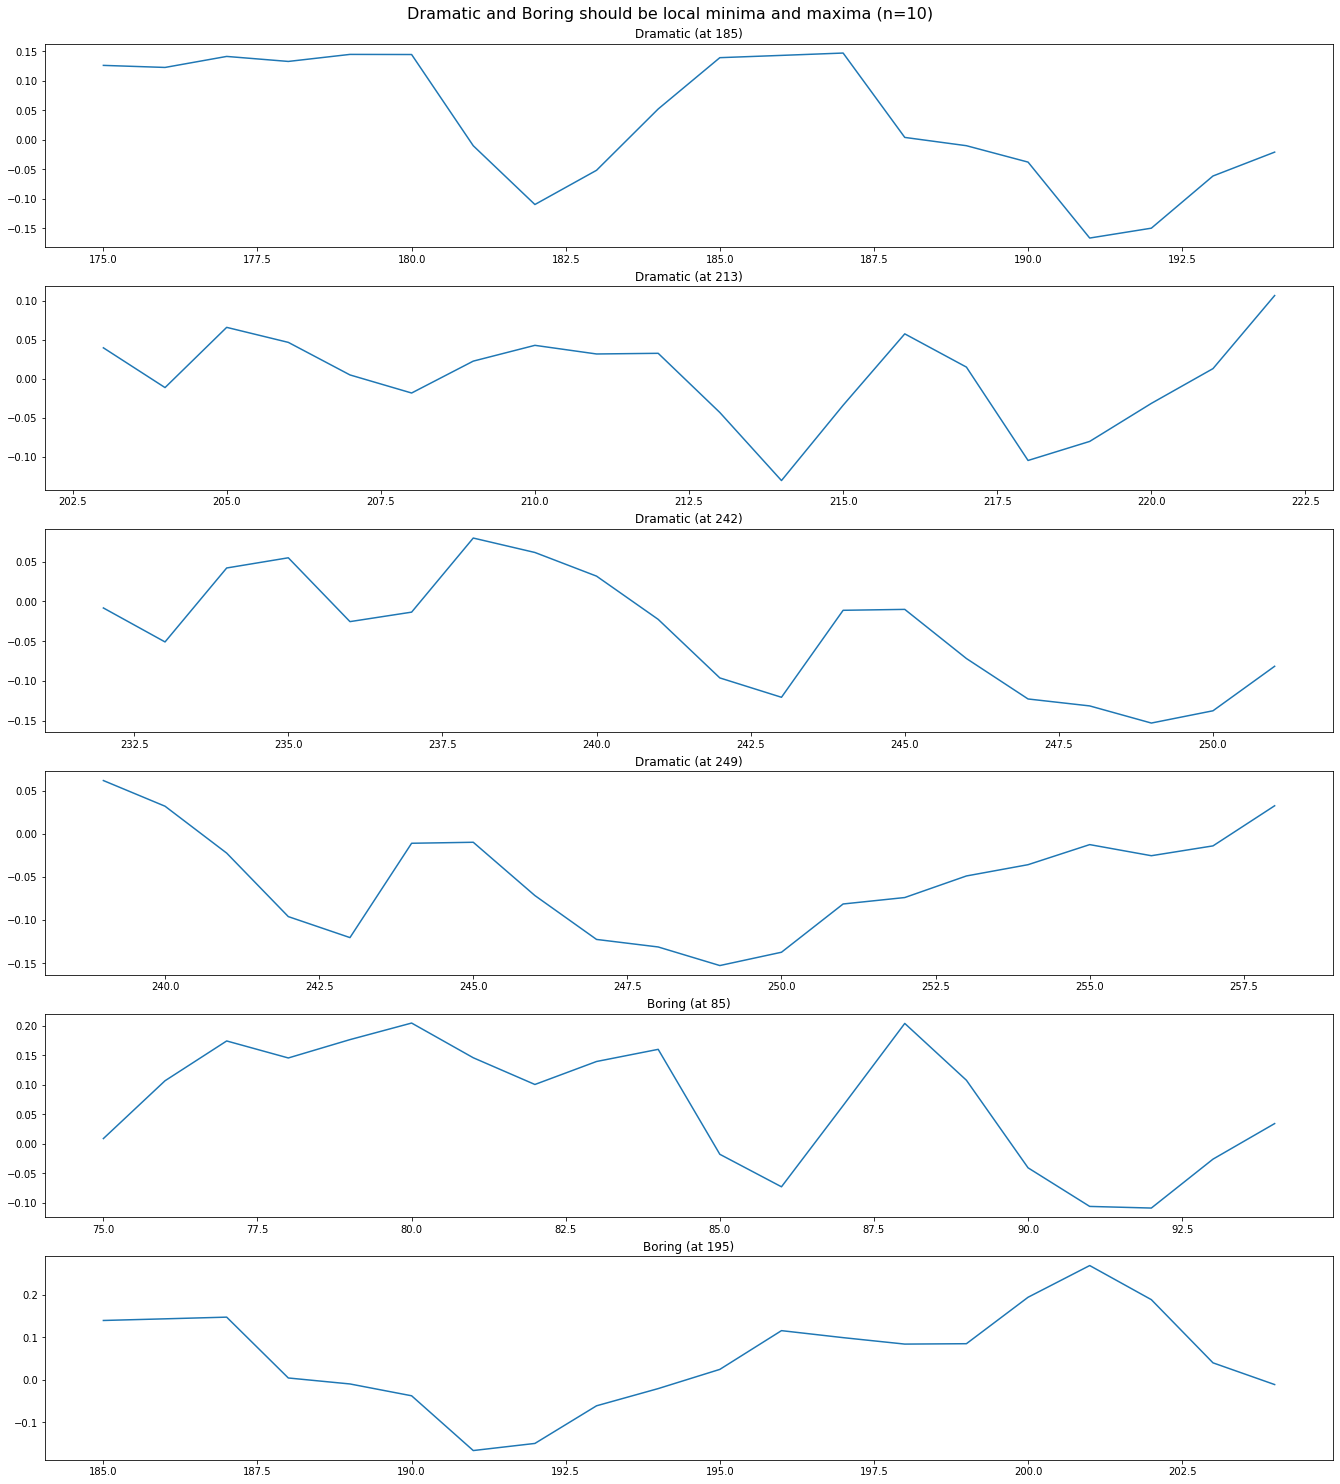

[1852, 2137, 2428, 2494] [855, 1958]
Boring segment:  42 41
Dramatic segment:  92 91
Boring segment:  97 96
Dramatic segment:  106 105
Dramatic segment:  121 120
Dramatic segment:  124 123
92 -1 range(82, 102) [0.11921768292682934, 0.10899268292682927, 0.11723743902439024, 0.12678902439024395, 0.1307840243902439, 0.14172256097560973, 0.13094487804878047, 0.1045820731707317, 0.0028446341463414554, 0.010000609756097546, 0.1303656097560976, 0.08122280487804881, -0.05716390243902439, -0.10976365853658535, -0.05603036585365855, 0.051110975609756096, 0.1068070731707317, 0.15958609756097558, 0.16309475609756097, 0.0816379268292683]
106 0 range(96, 116) [-0.05603036585365855, 0.051110975609756096, 0.1068070731707317, 0.15958609756097558, 0.16309475609756097, 0.0816379268292683, 0.021366951219512195, 0.018341829268292684, 0.010645853658536583, 0.010787804878048785, -0.03499268292682927, -0.012319390243902446, -0.03214963414634148, -0.05787085365853659, 0.03863036585365854, 0.023385487804878053,

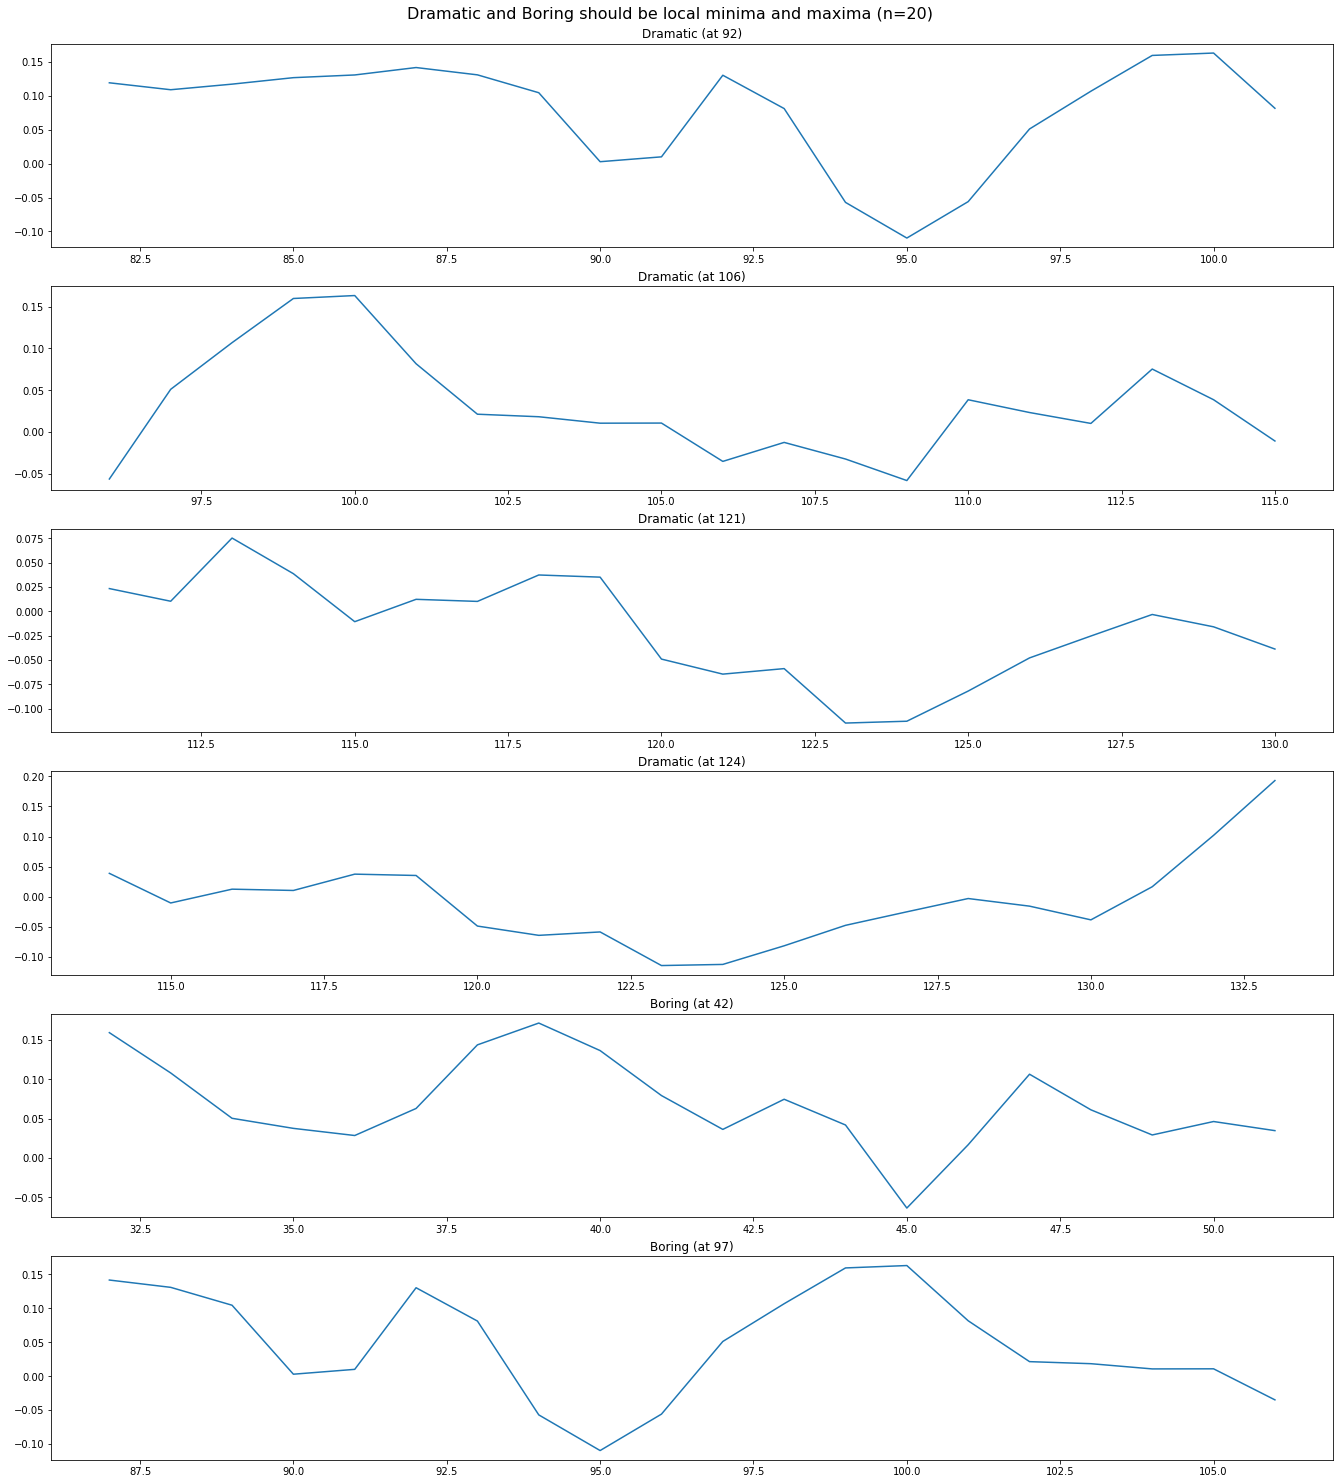

[1852, 2137, 2428, 2494] [855, 1958]
Boring segment:  21 20
Dramatic segment:  46 45
Boring segment:  48 47
Dramatic segment:  53 52
Dramatic segment:  60 59
Dramatic segment:  62 61
46 -1 range(36, 56) [0.025423425925925933, 0.07835743827160496, 0.10211317901234569, 0.08645675925925923, 0.11116441358024695, 0.12154256172839505, 0.12840154320987657, 0.12855296296296295, 0.061596049382716025, 0.058712222222222214, 0.005837376543209875, -0.04182037037037036, 0.0707186728395062, 0.12968438271604943, 0.07385453703703705, 0.011675339506172843, -0.003207746913580248, -0.03642515432098766, -0.007157438271604941, 0.037375370370370364]
53 0 range(43, 63) [0.12855296296296295, 0.061596049382716025, 0.058712222222222214, 0.005837376543209875, -0.04182037037037036, 0.0707186728395062, 0.12968438271604943, 0.07385453703703705, 0.011675339506172843, -0.003207746913580248, -0.03642515432098766, -0.007157438271604941, 0.037375370370370364, 0.030348765432098756, 0.016209043209876556, 0.0279658950617283

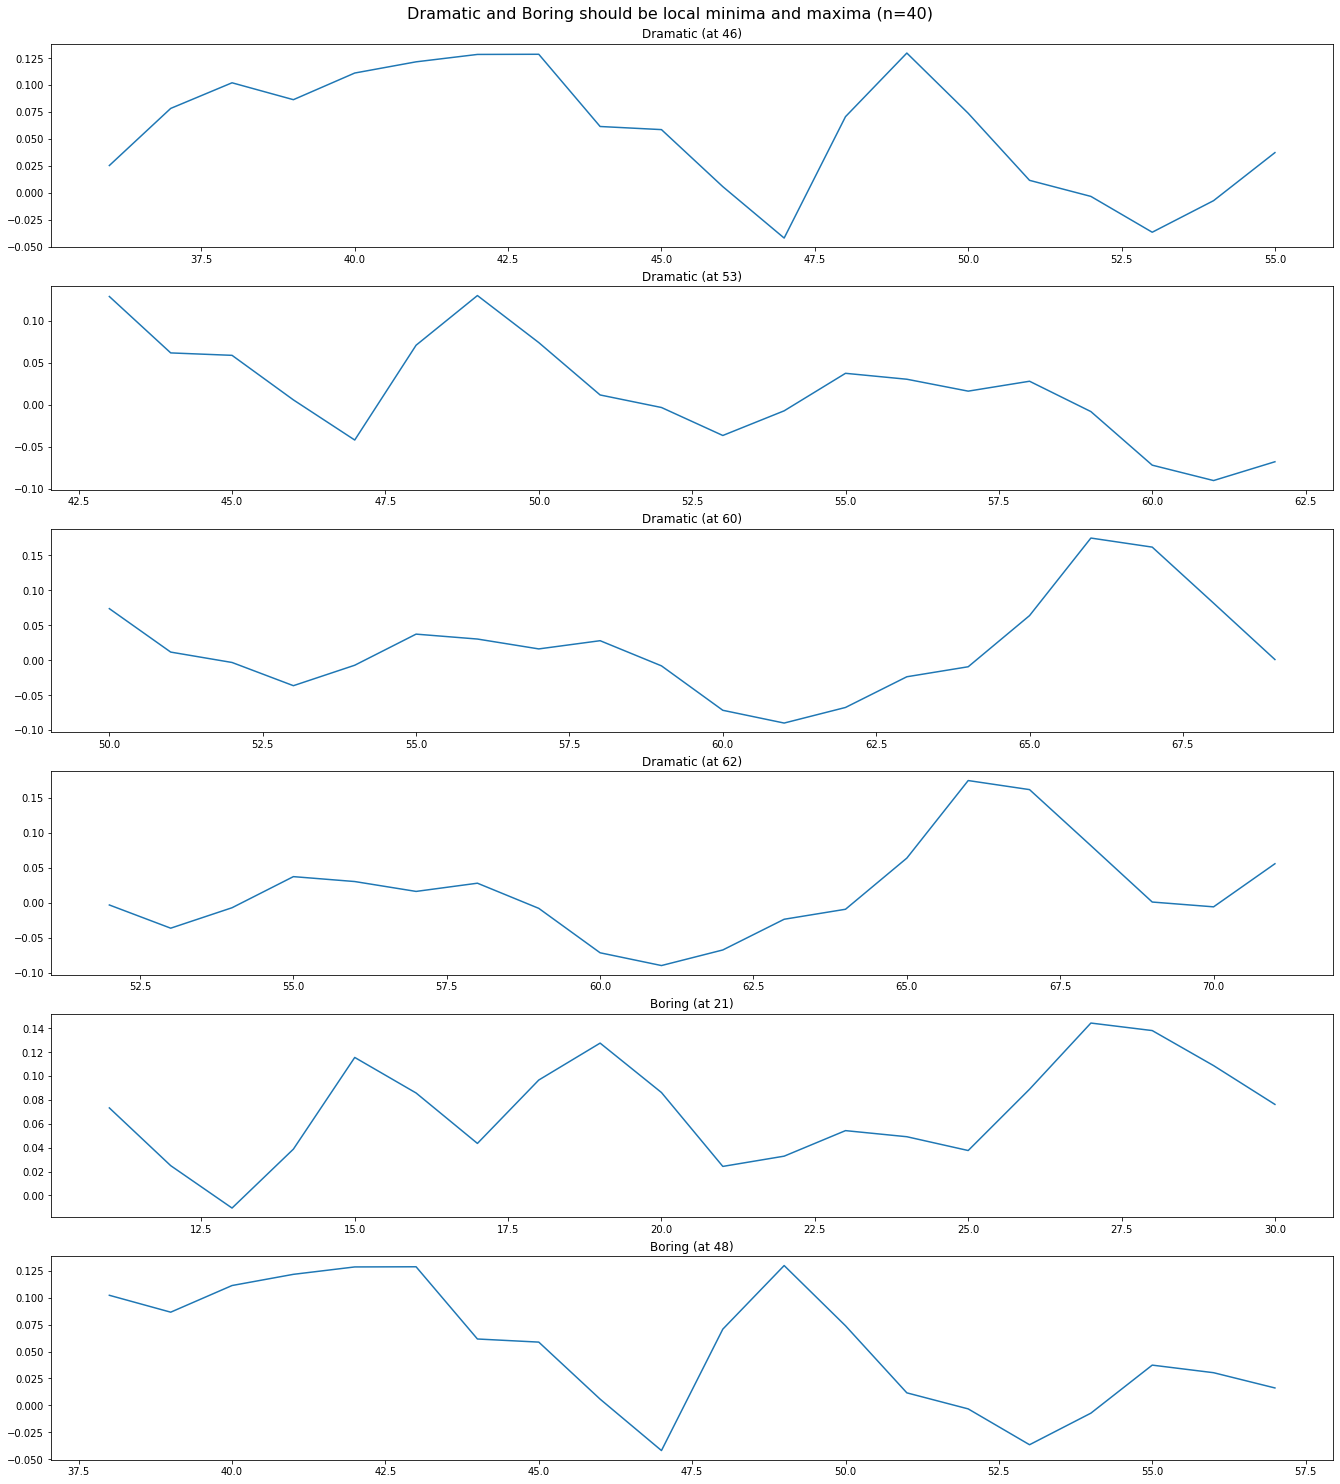

[1852, 2137, 2428, 2494] [855, 1958]
Boring segment:  12 11
Dramatic segment:  26 25
Boring segment:  27 26
Dramatic segment:  30 29
Dramatic segment:  34 33
Dramatic segment:  35 34
26 -1 range(16, 36) [0.10611099290780146, 0.06852198581560284, 0.03852806484295846, 0.02774618034447822, 0.05432724417426545, 0.08111674772036476, 0.10213991894630191, 0.12428085106382983, 0.09791275582573455, 0.04424022289766969, 0.019188368794326238, 0.05939959473150962, 0.062075217831813564, -0.0053561094224924, -0.00437699088145897, 0.023577507598784183, 0.029862573454913874, -0.015394316109422485, -0.06358652482269503, -0.049060668693009124]
30 0 range(20, 40) [0.05432724417426545, 0.08111674772036476, 0.10213991894630191, 0.12428085106382983, 0.09791275582573455, 0.04424022289766969, 0.019188368794326238, 0.05939959473150962, 0.062075217831813564, -0.0053561094224924, -0.00437699088145897, 0.023577507598784183, 0.029862573454913874, -0.015394316109422485, -0.06358652482269503, -0.049060668693009124, 

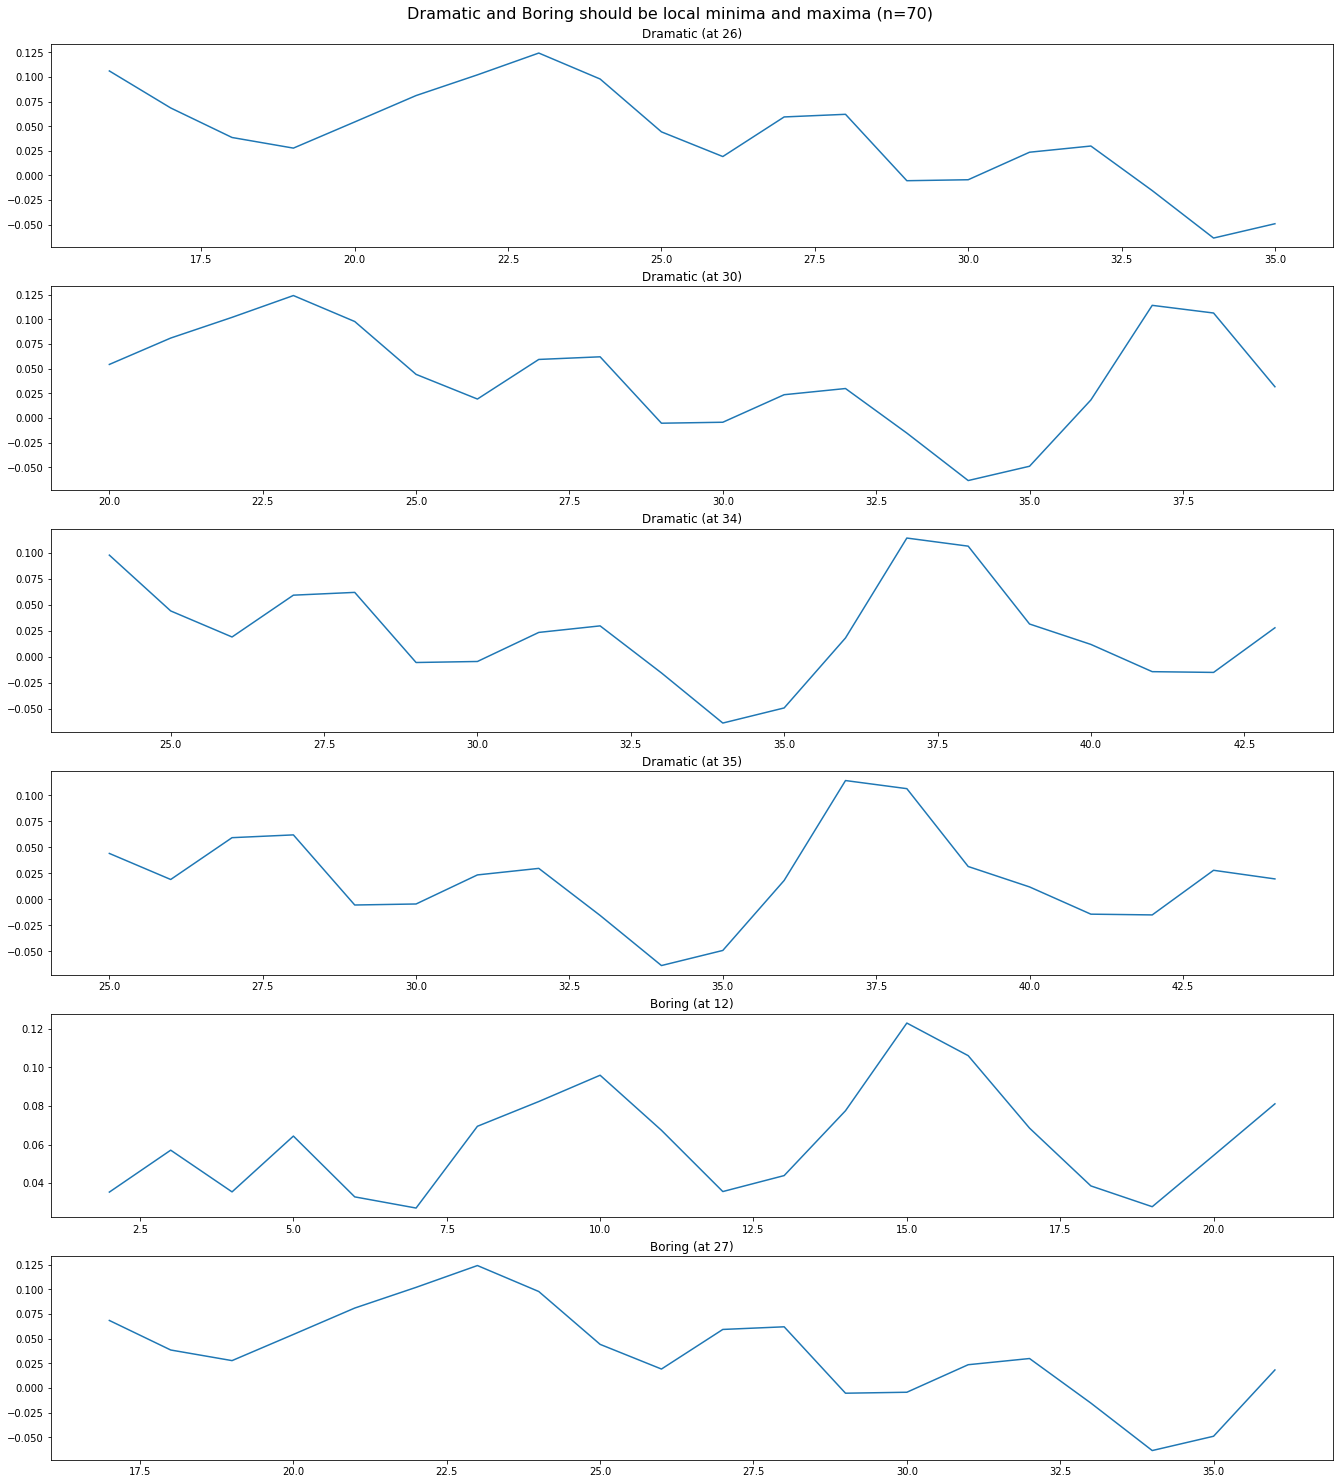

In [21]:
do_segmentation(5, timeline)
do_segmentation(10, timeline)
do_segmentation(20, timeline)
do_segmentation(40, timeline)
do_segmentation(70, timeline)

Again, here we can see promising first results. One aspect to consider would be to discriminate dialogue and narrative paragraphs differently as they are kind of two different beasts. I will also add analysis of "average paragraph sentence count" by combining discussion sections as "same paragraph" (if NLTK doesn't do this automatically). My intuition says that n should equal to the average sentence length of a paragraph.

In [ ]:
# read this: https://iopscience.iop.org/article/10.1088/1742-5468/2009/02/P02066/pdf

## Second part of Non-Linear Adaptive Filtering; the polynomial fitting

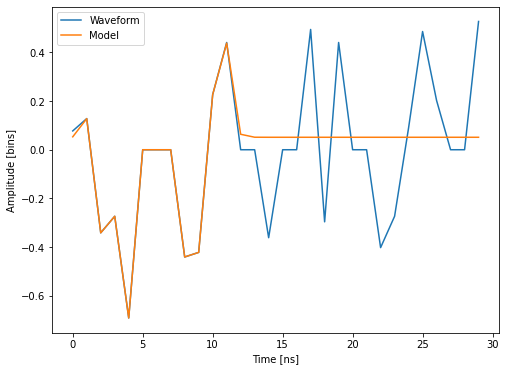

In [44]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.optimize import leastsq


def model(t, coeffs):
    return coeffs[0] + \
           coeffs[1] * np.exp(-((t-coeffs[2])/coeffs[3])**2) + \
           coeffs[4] * np.exp(-((t-coeffs[5])/coeffs[6])**2) + \
           coeffs[7] * np.exp(-((t-coeffs[8])/coeffs[9])**2) + \
           coeffs[10] * np.exp(-((t-coeffs[11])/coeffs[12])**2) + \
           coeffs[13] * np.exp(-((t-coeffs[14])/coeffs[15])**2) + \
           coeffs[16] * np.exp(-((t-coeffs[17])/coeffs[18])**2) + \
           coeffs[19] * np.exp(-((t-coeffs[20])/coeffs[21])**2) + \
           coeffs[22] * np.exp(-((t-coeffs[23])/coeffs[24])**2) + \
           coeffs[25] * np.exp(-((t-coeffs[26])/coeffs[27])**2)


def residuals(coeffs, y, t):
    return y - model(t, coeffs)

data = timeline[370:400]
t = np.arange(len(data))
x0 = np.array([1, 0, 1, 1, 1, 1, 1, 0, -1, -1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, -1, -1, 0, 0, 1, 0, 1, 1], dtype=float)
x, flag = leastsq(residuals, x0, args=(data, t), maxfev=120000)

fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(t, data, t, model(t, x))
plt.xlabel('Time [ns]')
plt.ylabel('Amplitude [bins]')
plt.legend(['Waveform', 'Model'])
plt.show()